# Model to classify Dogs and Cats

**Importing the libraries and necessary modules**

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import losses
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Activation, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings

**Assigning the location of the files**

In [24]:
train_path = '/content/drive/MyDrive/datasets/dogvscats/train'
test_path = '/content/drive/MyDrive/datasets/dogvscats/test'
valid_path = '/content/drive/MyDrive/datasets/dogvscats/valid'

**Function to view images**

In [25]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize = (20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show

**Pictures of Cats and Dogs**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


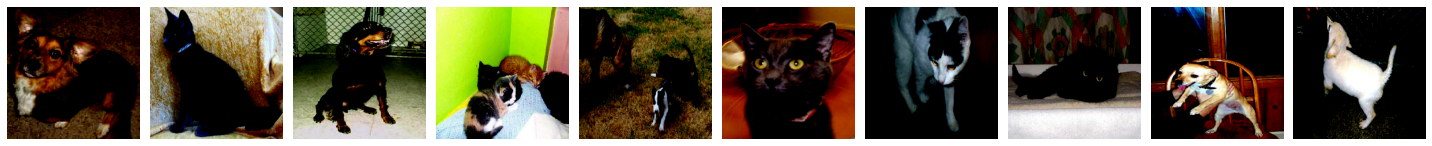

In [26]:
imgs, labels = next(train_batches)
plotImages(imgs)
print(labels)

**Preprocessing the input images**

In [27]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input) .flow_from_directory(directory=train_path, target_size=(299,299), color_mode = 'rgb' , classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input) .flow_from_directory(directory=valid_path, target_size=(299,299), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input) .flow_from_directory(directory=test_path, target_size=(299,299), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


**Loading the Inceptionv3 model**

In [8]:
model = applications.inception_v3.InceptionV3()

96116736/96112376 [==============================] - 1s 0us/step


**Layers of the Inceptionv3 model**

In [9]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

**Replacing the last two layers of Inceptionv3 model with the final layer of 2 neurons**

In [10]:
x = model.layers[-2].output
output = Dense(units = 2, activation='softmax')(x)

**Creating the improvised version of Inceptionv3 model**

In [12]:
model = Model(inputs=model.input, outputs = output)

**Setting the trainable parameter to false for all the layers except for last 23 layers**

In [13]:
for layer in model.layers[:-23]:
  layer.trainable = False

**Summary of the transferred model**

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

**Model compilation**

In [15]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

**Training the Model**

In [16]:
model.fit(x = train_batches, validation_data = valid_batches, epochs=5, verbose=1)

Epoch 1/5
100/100 [==============================] - 350s 3s/step - loss: 0.0984 - accuracy: 0.9700 - val_loss: 0.0340 - val_accuracy: 0.9900
Epoch 2/5
100/100 [==============================] - 244s 2s/step - loss: 0.0390 - accuracy: 0.9890 - val_loss: 0.0322 - val_accuracy: 0.9900
Epoch 3/5
100/100 [==============================] - 244s 2s/step - loss: 0.0285 - accuracy: 0.9860 - val_loss: 0.0312 - val_accuracy: 0.9950
Epoch 4/5
100/100 [==============================] - 244s 2s/step - loss: 0.0206 - accuracy: 0.9940 - val_loss: 0.0234 - val_accuracy: 0.9950
Epoch 5/5
100/100 [==============================] - 246s 2s/step - loss: 0.0159 - accuracy: 0.9960 - val_loss: 0.0282 - val_accuracy: 0.9950


**Confusion Matrix function**

In [17]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**Predictions for test cases**

In [18]:
test_labels = test_batches.classes
predictions = model.predict(x = test_batches, verbose = 0)

**Visualizing the accuracy of predictions**

Confusion matrix, without normalization
[[49  1]
 [ 0 50]]


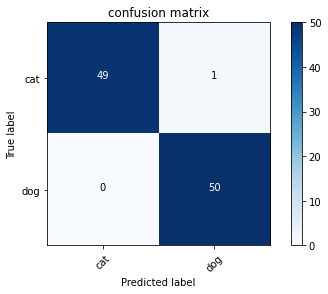

In [19]:
cm = confusion_matrix(y_true = test_labels, y_pred = predictions.argmax(axis = 1))
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm = cm, classes = cm_plot_labels, title = 'confusion matrix')

**Saving the model**

In [20]:
model.save('dogsvscats.h5')